In [18]:
%load_ext autotime
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer,classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

time: 0 ns (started: 2022-10-01 14:42:32 +07:00)


In [19]:
df = pd.read_csv('Train_Preprocessed_LamaKuliah.csv')
df=df.drop(columns=["Fakultas"])
df["Lama_Kuliah"] = df["Lama_Kuliah"].astype(str) 
df.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,...,0,1,0,0,0,0,0,1,0,0
1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,...,0,1,0,0,0,0,1,1,0,1
2,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,...,0,0,0,0,0,0,1,0,0,0
3,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,...,0,1,0,0,0,1,0,1,0,0
4,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,...,0,0,0,0,0,1,0,0,0,1


time: 47 ms (started: 2022-10-01 14:42:33 +07:00)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Lama_Kuliah"), df["Lama_Kuliah"], stratify=df["Lama_Kuliah"], 
                                                    test_size=.25, random_state=123456)

time: 31 ms (started: 2022-10-01 14:42:35 +07:00)


# Modelling 

## RF BASED

In [21]:
clf = RandomForestClassifier(random_state=12345)

time: 0 ns (started: 2022-10-01 14:42:36 +07:00)


In [22]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=12345)

time: 3.2 s (started: 2022-10-01 14:42:36 +07:00)


In [23]:
RF_Pred_Test=clf.predict(X_test)

time: 94 ms (started: 2022-10-01 14:42:39 +07:00)


In [24]:
# Check Classification report
print(classification_report(y_test,RF_Pred_Test))

              precision    recall  f1-score   support

         3.5       0.14      0.15      0.15       352
         4.0       0.10      0.11      0.10       360
         4.5       0.13      0.16      0.14       372
         5.0       0.14      0.14      0.14       372
         5.5       0.11      0.10      0.11       354
         6.0       0.16      0.15      0.16       353
         6.5       0.11      0.09      0.10       345
         7.0       0.13      0.11      0.12       367

    accuracy                           0.13      2875
   macro avg       0.13      0.13      0.13      2875
weighted avg       0.13      0.13      0.13      2875

time: 78 ms (started: 2022-10-01 14:42:39 +07:00)


## SVM

In [25]:
SVC_Model=SVC(gamma="auto")

time: 0 ns (started: 2022-10-01 14:42:39 +07:00)


In [26]:
SVC_Model.fit(X_train,y_train)

SVC(gamma='auto')

time: 9.02 s (started: 2022-10-01 14:42:40 +07:00)


In [27]:
SVC_Pred_Test=SVC_Model.predict(X_test)

time: 3.25 s (started: 2022-10-01 14:42:49 +07:00)


In [28]:
# Check Classification report
print(classification_report(y_test,SVC_Pred_Test))

              precision    recall  f1-score   support

         3.5       0.18      0.01      0.01       352
         4.0       0.13      0.01      0.01       360
         4.5       0.12      0.20      0.15       372
         5.0       0.13      0.72      0.21       372
         5.5       0.14      0.01      0.01       354
         6.0       0.25      0.01      0.02       353
         6.5       0.00      0.00      0.00       345
         7.0       0.12      0.03      0.05       367

    accuracy                           0.13      2875
   macro avg       0.13      0.12      0.06      2875
weighted avg       0.13      0.13      0.06      2875

time: 63 ms (started: 2022-10-01 14:42:52 +07:00)


# Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

time: 0 ns (started: 2022-10-01 14:42:52 +07:00)


In [30]:
# Built the model
model1=MultinomialNB().fit(X_train, y_train)

time: 31 ms (started: 2022-10-01 14:42:52 +07:00)


In [31]:
# Predict the model
predicted=model1.predict(X_test)

time: 0 ns (started: 2022-10-01 14:42:52 +07:00)


In [32]:
# Check Classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         3.5       0.12      0.07      0.09       352
         4.0       0.13      0.07      0.09       360
         4.5       0.12      0.22      0.15       372
         5.0       0.11      0.17      0.14       372
         5.5       0.11      0.12      0.11       354
         6.0       0.13      0.11      0.12       353
         6.5       0.14      0.05      0.07       345
         7.0       0.10      0.10      0.10       367

    accuracy                           0.12      2875
   macro avg       0.12      0.12      0.11      2875
weighted avg       0.12      0.12      0.11      2875

time: 47 ms (started: 2022-10-01 14:42:52 +07:00)


In [33]:
import pickle
pickle.dump(clf , open('LamaKuliah_RF', 'wb'))
pickle.dump(SVC_Model, open('LamaKuliah_SVM', 'wb'))
pickle.dump(model1, open('LamaKuliah_NaiveBayes', 'wb'))

time: 78 ms (started: 2022-10-01 15:34:09 +07:00)


# Prediksi Lama Kuliah

In [37]:
dftest = pd.read_csv('Test_Preprocessed.csv')
dftest.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,61.8,85.9,81.5,72.1,87.2,70.7,62.4,60.8,66.0,80.0,...,0,0,1,0,0,0,1,0,0,1
1,70.3,85.8,87.6,73.3,68.5,65.5,86.7,77.1,77.6,83.0,...,0,0,0,1,0,0,1,1,0,1
2,72.3,84.9,61.9,62.6,76.6,72.2,76.3,70.2,64.0,70.1,...,0,0,1,0,0,1,0,0,1,0
3,73.7,68.3,74.8,87.2,60.7,87.1,84.8,65.2,61.0,75.1,...,0,0,0,0,0,0,0,1,0,1
4,72.1,78.0,66.5,75.8,69.3,71.2,70.1,67.4,78.7,70.8,...,0,0,0,0,1,0,1,1,0,0


time: 32 ms (started: 2022-10-01 15:39:51 +07:00)


In [39]:
testpred = SVC_Model.predict(dftest)

time: 547 ms (started: 2022-10-01 15:40:08 +07:00)


In [41]:
dfresult = dftest
dfresult['Lama_Kuliah'] = testpred
dfresult.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others,Lama_Kuliah
0,61.8,85.9,81.5,72.1,87.2,70.7,62.4,60.8,66.0,80.0,...,0,1,0,0,0,1,0,0,1,5.0
1,70.3,85.8,87.6,73.3,68.5,65.5,86.7,77.1,77.6,83.0,...,0,0,1,0,0,1,1,0,1,5.0
2,72.3,84.9,61.9,62.6,76.6,72.2,76.3,70.2,64.0,70.1,...,0,1,0,0,1,0,0,1,0,7.0
3,73.7,68.3,74.8,87.2,60.7,87.1,84.8,65.2,61.0,75.1,...,0,0,0,0,0,0,1,0,1,5.0
4,72.1,78.0,66.5,75.8,69.3,71.2,70.1,67.4,78.7,70.8,...,0,0,0,1,0,1,1,0,0,5.0


time: 15 ms (started: 2022-10-01 15:43:07 +07:00)


<AxesSubplot: title={'center': 'Lama Kuliah'}>

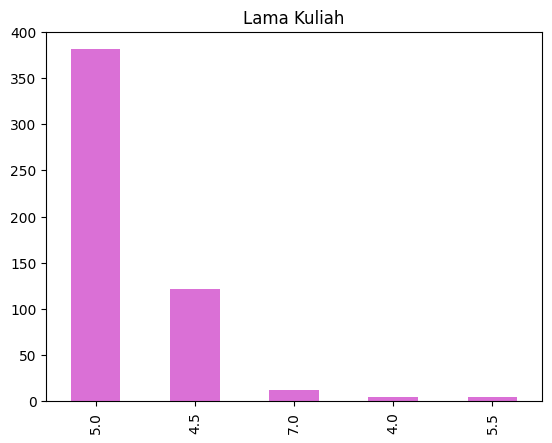

time: 156 ms (started: 2022-10-01 15:44:47 +07:00)


In [46]:
dfresult['Lama_Kuliah'].value_counts().plot(kind = 'bar', title = 'Lama Kuliah', color = 'orchid')

In [47]:
dfresult.to_csv('HasilTest1.csv', index = False)

time: 0 ns (started: 2022-10-01 15:49:01 +07:00)
